## Principal component analysis

In [5]:
import pytraj as pt
import nglview as nv
import numpy as np
import parmed
from matplotlib import pyplot as plt

In [6]:
%cd ~/workshop_pytraj/example_02

/home/user090/workshop_pytraj/example_02


Load all trajectory frames for analysis 

In [7]:
frames=pt.iterload('mdcrd_nowat.xtc', top = 'prmtop_nowat.parm7')
frames = frames.autoimage()

### Perform PCA analysis

- Analyze 39 nucleic acid residues, 6 backbone atoms in each residue. The total number of atoms included in the analysis is 234, so eigenvectors will be 234 elements long.
- Request calculations of the three first principal components  

In [8]:
data = pt.pca(frames, mask=":860-898@O3',C3',C4',C5',O5',P", n_vecs=5)

- The results are saved in the structure *data*
- Projection values of each frame to each of the 5 modes are saved in the arrays data[0][0], ... , data[0][4]
- Eigvenvalues of the first 5 modes are saved in the array data[1][0]
- Eigvenvectors of first 5 modes are saved in the arrays data[1][1][0], ... , data[1][1][4]

In [9]:
print('Projection values of each frame to the first mode = {} \n'.format(data[0][0]))
print('Eigvenvalues of the first 5 modes:\n', data[1][0])
print('Eigvenvector of the first 5 mode:\n', data[1][1][0])

Projection values of each frame to the first mode = [-6.1720915 -7.662613  -5.8787603 ...  8.820289   7.7914424  9.029832 ] 

Eigvenvalues of the first 5 modes:
 [65.33185583 15.95989193 10.1415621   6.30655195  5.83093189]
Eigvenvector of the first 5 mode:
 [-0.02537156  0.02003605  0.03835036 ... -0.08759576  0.10445563
 -0.07816218]


- Plot projection of each frame on the first two modes
- Color by frame number

[Available color maps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

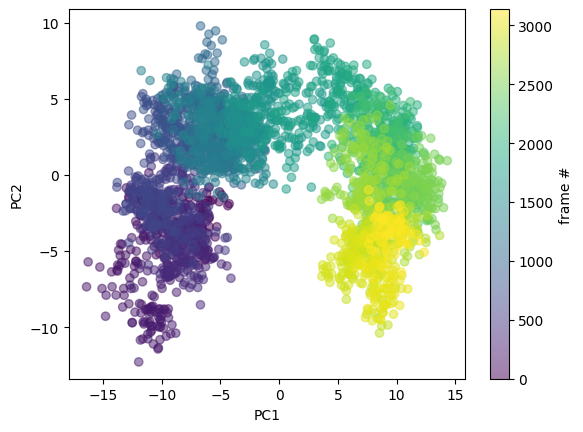

In [6]:
plt.scatter(data[0][0], data[0][1], cmap='viridis', marker='o', c=range(frames.n_frames), alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
cbar.set_label('frame #')

The graph shows that the first component separates data into two clusters. The first cluster existed in the beginning of the simulation, and later in the simulation the average projection on this component shifted from 10 to -5. This example trajectory is too short for any reliable conclusion. The results suggest that the system may not yet reached equilibrium.

### Save data for visualization with VMD plugin Normal Mode Wizard

Create topology matching atom selections that we used for PCA

In [8]:
top_nuc = pt.load('inpcrd.pdb', mask =":860-898@O3',C3',C4',C5',O5',P")

Convert coordinates (top_nuc.xyz) to a flat list

In [9]:
top_nuc.xyz

array([[[-24.602,  -0.897, -14.45 ],
        [-23.192,  -1.498, -14.906],
        [-22.952,  -2.901, -14.942],
        ...,
        [-27.686, -16.843, -18.806],
        [-26.288, -16.599, -19.35 ],
        [-26.348, -15.654, -20.4  ]]])

In [10]:
coords = list(np.concatenate(top_nuc.xyz).flat)

In [11]:
with open("modes.nmd", "w") as outfile:
    outfile.write("title PCA modes\n")
    outfile.write("names {}\n".format(" ".join(i.name for i in top_nuc.topology.atoms)))
    outfile.write("resnames {}\n".format(" ".join(i.resname for i in top_nuc.topology.atoms)))
    outfile.write("chids {}\n".format(" ".join("A" for i in top_nuc.topology.atoms)))
    outfile.write("resnums {}\n".format(" ".join(str(i.resid) for i in top_nuc.topology.atoms)))
    outfile.write("betas {}\n".format(" ".join("50.0" for i in top_nuc.topology.atoms)))
    outfile.write("coordinates {}\n".format(" ".join(str(i) for i in coords)))
    outfile.write("mode 1 {}\n".format(" ".join(str(i) for i in data[1][1][0])))
    outfile.write("mode 2 {}\n".format(" ".join(str(i) for i in data[1][1][1])))

In [20]:
len(data[0][0])

3140